In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import json
import matplotlib.pyplot as plt
from seaborn import set_style
set_style("darkgrid")

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
data = pd.read_csv('/kaggle/input/asl-steven/frame-9-data.csv')
X = pd.read_csv('/kaggle/input/asl-steven/clean_features.txt')
y = pd.read_csv('/kaggle/input/asl-steven/clean_labels.txt')

In [3]:
train_df = pd.read_csv("/kaggle/input/asl-fingerspelling/train.csv")

In [4]:
def find_X_sequence_id(num):
    return data.loc[[num]].sequence_id.iloc[0]

In [5]:
def find_X_phrase(num):
    return train_df[train_df['sequence_id'] == find_X_sequence_id(num)].phrase.iloc[0]

In [6]:
X_1 = X.iloc[:,1:]

In [7]:
y_1 = y.iloc[:,1:]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [9]:
X_train = X_train.values.reshape(30862, 60, 1)
X_test = X_test.values.reshape(7716, 60, 1)

In [10]:
model = keras.Sequential([
    layers.Conv1D( 80, 4, activation='relu', input_shape=(60,1,)),
    layers.MaxPooling1D( 2, strides = 2 ),
    layers.Conv1D( 40, 4, activation='relu'),
    layers.MaxPooling1D( 2, strides = 2 ),
    layers.Flatten(),
    layers.Dropout(0.1),
    layers.Dense(128,activation = "relu" ),
    layers.Dense(128,activation = "relu" ),
    layers.Dense(256,activation = "relu" ),
    layers.Dropout(0.1),
    layers.Dense(59,activation = "softmax")
])

In [11]:
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [12]:
history = model.fit(X_train,y_train, batch_size=500, epochs = 350)

Epoch 1/350
62/62 [==============================] - 5s 52ms/step - loss: 3.3276 - accuracy: 0.1005
Epoch 2/350
62/62 [==============================] - 3s 52ms/step - loss: 3.2032 - accuracy: 0.1131
Epoch 3/350
62/62 [==============================] - 3s 52ms/step - loss: 3.0625 - accuracy: 0.1499
Epoch 4/350
62/62 [==============================] - 3s 53ms/step - loss: 2.8692 - accuracy: 0.2027
Epoch 5/350
62/62 [==============================] - 3s 52ms/step - loss: 2.6908 - accuracy: 0.2735
Epoch 6/350
62/62 [==============================] - 3s 51ms/step - loss: 2.5376 - accuracy: 0.3339
Epoch 7/350
62/62 [==============================] - 3s 51ms/step - loss: 2.4272 - accuracy: 0.3690
Epoch 8/350
62/62 [==============================] - 4s 58ms/step - loss: 2.3581 - accuracy: 0.3905
Epoch 9/350
62/62 [==============================] - 4s 73ms/step - loss: 2.3004 - accuracy: 0.4104
Epoch 10/350
62/62 [==============================] - 4s 56ms/step - loss: 2.2548 - accuracy: 0.4249

In [13]:
history_dict = history.history

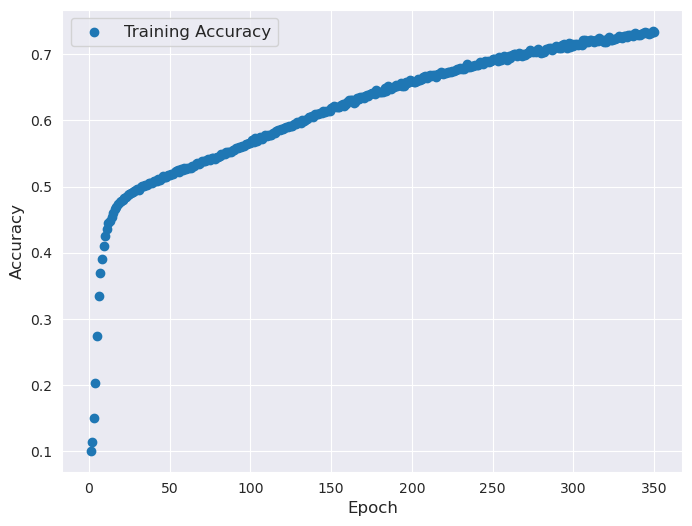

In [14]:
plt.figure(figsize = (8,6))

plt.scatter(range(1,350+1), history_dict['accuracy'], label = "Training Accuracy")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=12)

plt.show()

In [27]:
model.evaluate(X_test, y_test)

242/242 [==============================] - 1s 4ms/step - loss: 3.1944 - accuracy: 0.4794


[3.1944210529327393, 0.47939348220825195]

In [29]:
file_id = 1905462118

In [30]:
path_to_sign = f"/kaggle/input/asl-fingerspelling/train_landmarks/{file_id}.parquet"
sign = pd.read_parquet(path_to_sign)

In [31]:
sequence_ids = [1157345328, 1146539616, 1177681681, 1150768644, 1166052117, 1158568114, 1168924491, 1167512096]
#sequence_ids = [1157345328]

In [32]:
def prep_sequence(sequence):
    centered_sequence = sequence.copy()
    if sequence.x_right_hand_1.iloc[9] != 0:
        for i in range(21):
            centered_sequence['x_right_hand_'+str(i)] = sequence['x_right_hand_'+str(i)] - sequence['x_right_hand_0']
            centered_sequence['y_right_hand_'+str(i)] = sequence['y_right_hand_'+str(i)] - sequence['y_right_hand_0']
            centered_sequence['z_right_hand_'+str(i)] = sequence['z_right_hand_'+str(i)] - sequence['z_right_hand_0']
    if sequence.x_left_hand_1.iloc[9] != 0:
        for i in range(21):
            centered_sequence['x_right_hand_'+str(i)] = sequence['x_left_hand_0'] - sequence['x_left_hand_'+str(i)]
            centered_sequence['y_right_hand_'+str(i)] = sequence['y_left_hand_'+str(i)] - sequence['y_left_hand_0']
            centered_sequence['z_right_hand_'+str(i)] = sequence['z_left_hand_'+str(i)] - sequence['z_left_hand_0']
    return centered_sequence[right_hand_cols]
    

In [33]:
char_pred = open('/kaggle/input/asl-fingerspelling/character_to_prediction_index.json')

In [34]:
json_data = json.load(char_pred)

In [35]:
inv_map = {v: k for k, v in json_data.items()}

In [36]:
def num_to_char(num):
    return inv_map[num]

In [37]:
def all_equal(iterator):
    return len(set(iterator)) <= 1

In [38]:
for seq_id in sequence_ids:
    sequence = sign[sign.index == seq_id]
    centered_sequence = sequence.copy()
    for i in range(21):
        centered_sequence['x_right_hand_'+str(i)] = sequence['x_right_hand_'+str(i)] - sequence['x_right_hand_0']
        centered_sequence['y_right_hand_'+str(i)] = sequence['y_right_hand_'+str(i)] - sequence['y_right_hand_0']
        centered_sequence['z_right_hand_'+str(i)] = sequence['z_right_hand_'+str(i)] - sequence['z_right_hand_0']
        
    x_right_hand_cols_1 = sequence.columns[np.arange(524,544)]
    y_right_hand_cols_1 = sequence.columns[np.arange(1067,1087)]
    z_right_hand_cols_1 = sequence.columns[np.arange(1610, 1630)]
    right_hand_cols = np.concatenate((x_right_hand_cols_1, y_right_hand_cols_1, z_right_hand_cols_1))
        
    centered_sequence_right = centered_sequence[right_hand_cols]
        
    prediction = model.predict(centered_sequence_right)
        
    char_pred_frames = list(map(num_to_char, np.argmax(prediction, axis = 1).tolist()))
        
    string_predict = []
    for i in range(len(char_pred_frames)- 4):
        if all_equal(char_pred_frames[i:i+4]):
            string_predict += char_pred_frames[i]
        
    pruned_string_predict = string_predict[0]
    for i in range(len(string_predict)-1):
        if pruned_string_predict[-1] != string_predict[i]:
            pruned_string_predict += string_predict[i]
        
    print(pruned_string_predict)
    print(train_df.loc[train_df["sequence_id"] == seq_id, "phrase"].values)
    print("----------------------------------------------------------------")
    
        
        

3/3 [==============================] - 0s 4ms/step
95ap+
['9560 plano']
----------------------------------------------------------------
4/4 [==============================] - 0s 4ms/step
 
['crsalarysurvey.com/']
----------------------------------------------------------------
12/12 [==============================] - 0s 3ms/step
em mw g / h 9 
['empowerla.org/zanct/hafeedr']
----------------------------------------------------------------
10/10 [==============================] - 0s 3ms/step
 
['9602 san juan river']
----------------------------------------------------------------
4/4 [==============================] - 0s 4ms/step
 
['373240 meadowlark spr']
----------------------------------------------------------------
5/5 [==============================] - 0s 4ms/step
 
['+591-771-67-57']
----------------------------------------------------------------
9/9 [==============================] - 0s 3ms/step
41cnj ge a e+
['4112 cll genasaret']
-------------------------------------------

In [26]:
train_df.head()

,path,file_id,sequence_id,participant_id,phrase
0,train_landmarks/5414471.parquet,5414471,1816796431,217,3 creekhouse
1,train_landmarks/5414471.parquet,5414471,1816825349,107,scales/kuhaylah
2,train_landmarks/5414471.parquet,5414471,1816862427,0,hentaihubs.com
3,train_landmarks/5414471.parquet,5414471,1816909464,1,1383 william lanier
4,train_landmarks/5414471.parquet,5414471,1816967051,63,988 franklin lane


Should be '9560 plano'.

Difference is

* 9560 plano  
* 9560plano
* 956mplano
* 956mpano
* 956mpan

5 modifications needed.